---

## Import Libraries


___


In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

___


## Load Data (APTOS)

---

In [44]:
data_dir_aptos="/Users/soroush/Desktop/RetinAI/data/Aptos"
train_pth_aptos="/Users/soroush/Desktop/RetinAI/data/Aptos/train.csv"
test_pth_aptos="/Users/soroush/Desktop/RetinAI/data/Aptos/test.csv"
try:
    df_train_aptos=pd.read_csv(train_pth_aptos)
    print("train.csv loaded")
    print(f"found {len(df_train_aptos)} images")
except FileNotFoundError:
    print(f"error: couldn't find train.csv at '{train_pth_aptos}'")
    df_train_aptos=None

try:
    df_test_aptos=pd.read_csv(test_pth_aptos)
    print("test.csv loaded")
    print(f"found {len(df_test_aptos)} records")
except FileNotFoundError:
    print(f"error: couldn't find test.csv at '{test_pth_aptos}'")
    df_test_aptos=None

train.csv loaded
found 3662 images
test.csv loaded
found 1928 records


---

## Dataset Info (APTOS)

---

In [45]:
print("Train data info:")
print(df_train_aptos.info())
print(" ")
print(" ")
print("Train data description:")
print(df_train_aptos.describe())
print(" ")
print(" ")
missing_data_aptos_train=df_train_aptos.isnull().sum()
print(missing_data_aptos_train)

  

Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB
None
 
 
Train data description:
         diagnosis
count  3662.000000
mean      1.126980
std       1.298409
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max       4.000000
 
 
id_code      0
diagnosis    0
dtype: int64


In [46]:
print("Test data info:")
print(df_test_aptos.info())
print(" ")
print(" ")
print("test data description:")
print(df_test_aptos.describe())
print(" ")
print(" ")
missing_data_test_aptos_test=df_test_aptos.isnull().sum()
print(missing_data_test_aptos_test)  

Test data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1928 entries, 0 to 1927
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id_code  1928 non-null   object
dtypes: object(1)
memory usage: 15.2+ KB
None
 
 
test data description:
             id_code
count           1928
unique          1928
top     0005cfc8afb6
freq               1
 
 
id_code    0
dtype: int64


---

## EDA (APTOS)

---

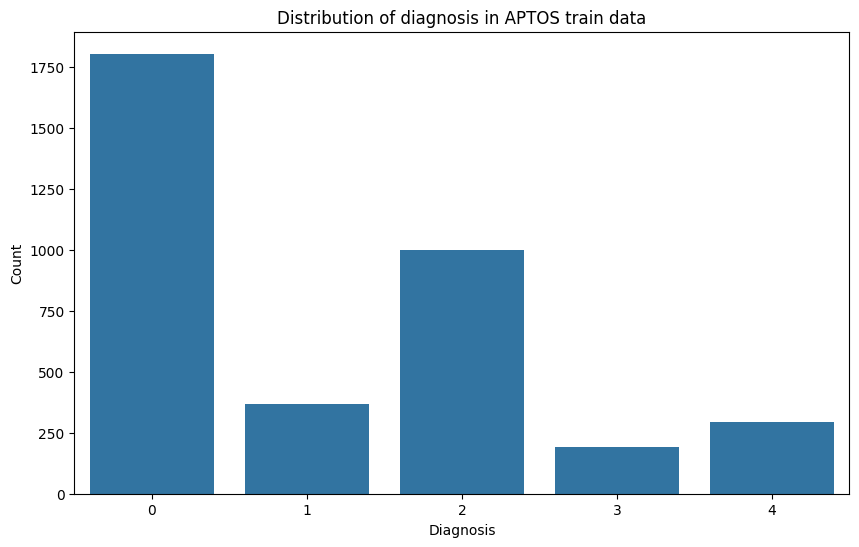

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(x='diagnosis', data=df_train_aptos)
plt.title('Distribution of diagnosis in APTOS train data')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

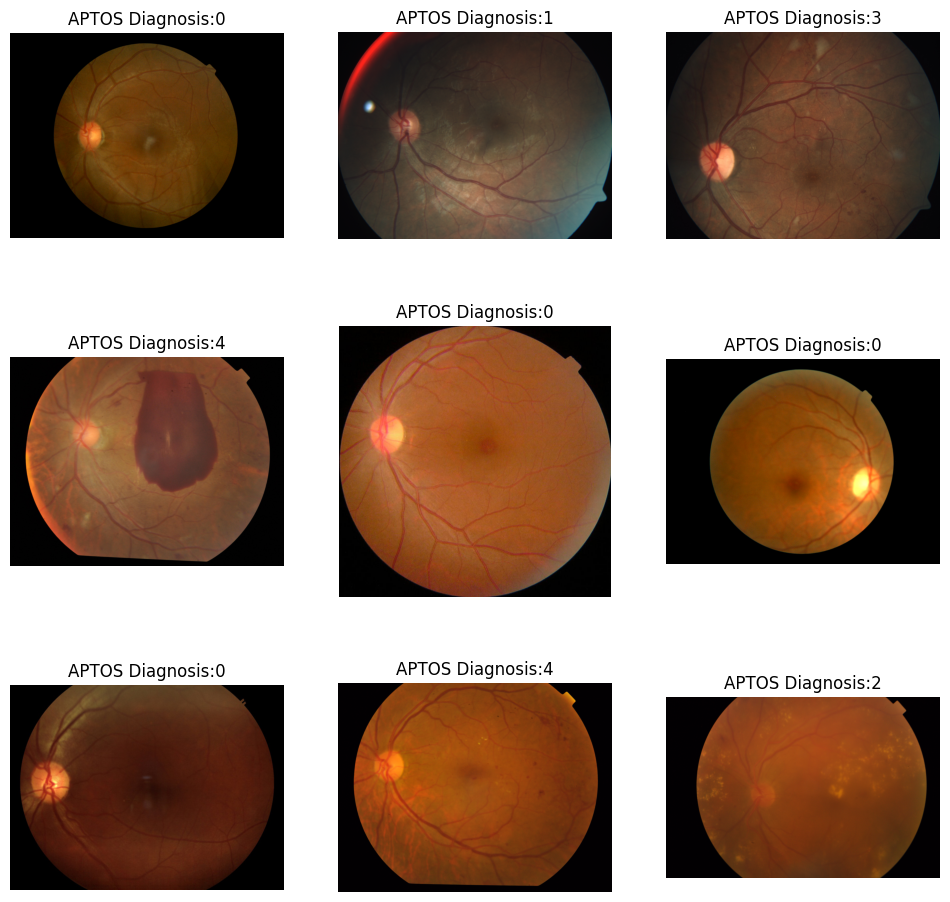

In [48]:
sample_images=df_train_aptos.sample(9,random_state=42)
plt.figure(figsize=(12,12))
for i, row in enumerate(sample_images.itertuples(),1):
    img_path=os.path.join(data_dir_aptos,'train_images',row.id_code+'.png')
    img=Image.open(img_path)
    plt.subplot(3,3,i)
    plt.imshow(img)
    plt.title(f'APTOS Diagnosis:{row.diagnosis}')
    plt.axis('off')
plt.show()

---

## Load Data (IDRiD)

---

In [49]:
data_dir_idrid="/Users/soroush/Desktop/RetinAI/data/IDRiD"
train_pth_idrid="/Users/soroush/Desktop/RetinAI/data/IDRiD/B. Disease Grading/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv"
test_pth_idrid="/Users/soroush/Desktop/RetinAI/data/IDRiD/B. Disease Grading/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv"
try:
    df_train_idrid=pd.read_csv(train_pth_idrid)
    print("IDRiD train.csv loaded")
    print(f"found {len(df_train_idrid)} images")
except FileNotFoundError:
    print(f"error: couldn't find train.csv at '{train_pth_idrid}'")
    df_train_idrid=None

try:
    df_test_idrid=pd.read_csv(test_pth_idrid)
    print("IDRiD test.csv loaded")
    print(f"found {len(df_test_idrid)} records")
except FileNotFoundError:
    print(f"error: couldn't find test.csv at '{test_pth_idrid}'")
    df_test_idrid=None

IDRiD train.csv loaded
found 413 images
IDRiD test.csv loaded
found 103 records


---

## Dataset Info (IDRiD)

---

In [50]:
print("\nIDRiD Train data info:")
print(df_train_idrid.info())
print(" ")
print(" ")
print("IDRiD Train data description:")
print(df_train_idrid.describe())
print(" ")
print(" ")
missing_data_idrid_train=df_train_idrid.isnull().sum()
print("Missing values in IDRiD train data:")
print(missing_data_idrid_train)


IDRiD Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Image name              413 non-null    object 
 1   Retinopathy grade       413 non-null    int64  
 2   Risk of macular edema   413 non-null    int64  
 3   Unnamed: 3              0 non-null      float64
 4   Unnamed: 4              0 non-null      float64
 5   Unnamed: 5              0 non-null      float64
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Unnamed: 8              0 non-null      float64
 9   Unnamed: 9              0 non-null      float64
 10  Unnamed: 10             0 non-null      float64
 11  Unnamed: 11             1 non-null      object 
dtypes: float64(8), int64(2), object(2)
memory usage: 38.8+ KB
None
 
 
IDRiD Train data description:
       Retinopathy grade  R

In [51]:
print("\nIDRiD Test data info:")
print(df_test_idrid.info())
print(" ")
print(" ")
print("IDRiD Test data description:")
print(df_test_idrid.describe())
print(" ")
print(" ")
missing_data_idrid_test=df_test_idrid.isnull().sum()
print("Missing values in IDRiD test data:")
print(missing_data_idrid_test)


IDRiD Test data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Image name              103 non-null    object
 1   Retinopathy grade       103 non-null    int64 
 2   Risk of macular edema   103 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB
None
 
 
IDRiD Test data description:
       Retinopathy grade  Risk of macular edema 
count         103.000000              103.000000
mean            1.728155                1.029126
std             1.415559                0.954415
min             0.000000                0.000000
25%             0.000000                0.000000
50%             2.000000                1.000000
75%             3.000000                2.000000
max             4.000000                2.000000
 
 
Missing values in IDRiD test data:
Image name                0
Retinopathy grade

---

## EDA (IDRiD)

---


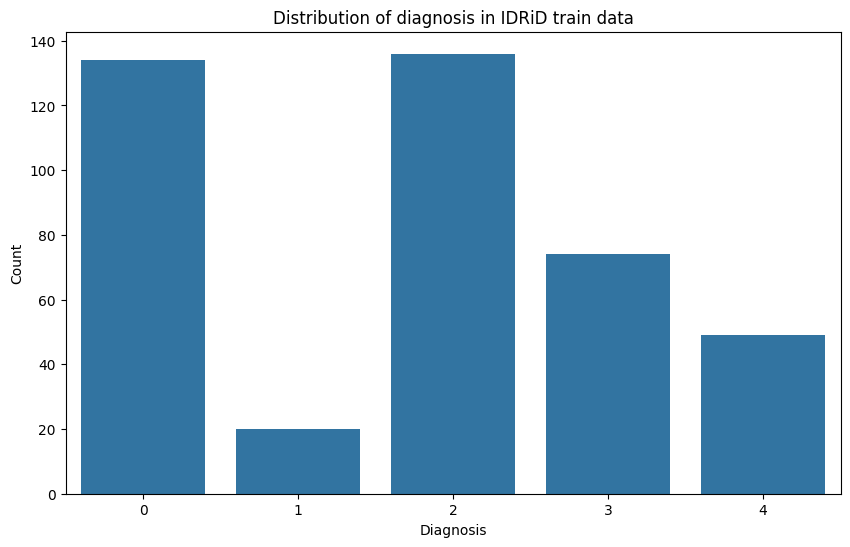

In [54]:
df_train_idrid.rename(columns={'Retinopathy grade':'diagnosis'}, inplace=True)
plt.figure(figsize=(10,6))
sns.countplot(x='diagnosis', data=df_train_idrid)
plt.title('Distribution of diagnosis in IDRiD train data')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()